# Assignment I - Part 3

Student ID: R00182510<br>
Name : Sriranjani Sridharan

## Code for Section (i) and Section (ii)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Calculate the distance between the fetures of the test instance and features of the training instances based on the 
# distance metric

def calculateDistance(train_data, test_instance, dist_metric):
    distance = np.power((np.sum((abs(train_data-test_instance))**dist_metric,axis=1)), 1/dist_metric)
    indices = np.argsort(distance)
    return (distance,indices)                

In [3]:
# For every test instance, get the distances of K nearest neighbour instances and predict its class label using 
# the K weighted distances

def predict_weighted_testinstance(k, train_data, test_data, train_label, dist_metric, n):
    
    predicted_test_instances = []
    
    for instance in test_data:
        
        distance,indices = calculateDistance(train_data, instance, dist_metric)
        k_indices = [indices[i] for i in range(0, k)]
        k_distance = np.take(distance, k_indices) 
        
        tot_inv_distance = 0
        distance_vote = 0
       
        # for every kth training instance, calculate its inverse distance or voting distance from the test instance
        # The final prediction is influenced more by the closer neighbours than the far ones
        
        for x, dist in zip(k_indices, k_distance):
            distance_vote += (train_label[x] * ((1/dist)**n))
            tot_inv_distance += ((1/dist)**n)
        
        predicted_test_instances.append(distance_vote/tot_inv_distance)
        
    return predicted_test_instances
        

In [4]:
# Normalization of training and test data is done so that each feature has an independent contribution in the prediction
# process

def Normalize_data(train, test):
    trainmin, trainmax = np.amin(train, axis = 0), np.amax(train, axis = 0)
    
    # Use the same max and min values from the training data to normalize both the training and the test data
    train_data = (train - trainmin)/ (trainmax - trainmin)
    test_data = (test - trainmin)/ (trainmax - trainmin)
    
    return (train_data, test_data)

In [5]:
# Get the K value, distance metrics, and the inverse distance calculation type(n)

# The keyword argument Normalize is used to normalize the training and test datasets. 
# Default value is None - No normalization

def KNN_main_regression(k, dist_metric, n = 1, Normalize = None):
    
    # read input files
    train = np.genfromtxt('.\\data\\regression\\trainingData.csv',delimiter = ',')
    test = np.genfromtxt('.\\data\\regression\\testData.csv',delimiter = ',')

    k_values = k
    k_predictions_accuracy = []
    
    # Segregate the class labels from the feature data in both the training and test datasets
    train_label = train[:,-1]
    test_label = test[:,-1]
    
    # Normalize the training and the test data if Normalization is not None 
    if Normalize:
        train_data, test_data = Normalize_data(train[:,0:-1], test[:,0:-1]) 
    else:
        train_data = train[:,0:-1]
        test_data = test[:,0:-1]
    
    average_test_instance = np.mean(test_label)
    tot_sum_squares = ((average_test_instance - test_label)**2).sum()
    
    # for every K value, determine the KNN algorithm predictions and R^2 coefficient for the test data
    for k in k_values:
               
        predicted_instances = np.array(predict_weighted_testinstance(k,train_data, test_data, train_label, dist_metric, n),dtype = float)
        sum_squared_residuals = np.sum((predicted_instances - test_label)**2)
        
        k_accuracy = 1 - (sum_squared_residuals/tot_sum_squares)
        
        k_predictions_accuracy.append(k_accuracy)
        
        print("K : %d , R\u00b2 Coefficient : %3.4f" %(k, k_accuracy))
        
    return(k_predictions_accuracy)

## Section(i) Results

#### Execution with a range of K values and using inverse distance
The regression KNN model is initially implemeted using the defaults parameters for distance and the value n. <br> <br>
Distance = Euclidean <br> n = 1 (use inverse distance for weighting)

In [6]:
# For the range of K values given below, the R^2 coefficients are recorded
K = [1,2,5,10,12,15,20]
dist_metric = 1
n = 1

K_regression = KNN_main_regression(K, dist_metric, n = 1)


K : 1 , R² Coefficient : 0.6299
K : 2 , R² Coefficient : 0.7529
K : 5 , R² Coefficient : 0.8146
K : 10 , R² Coefficient : 0.8253
K : 12 , R² Coefficient : 0.8226
K : 15 , R² Coefficient : 0.8203
K : 20 , R² Coefficient : 0.8130


#### Implementation of Inverse distance square 
Distance = Euclidean<br>
n=2

When using the inverse distance square, the R^2 coefficient is higher, with K = 11 reporting the highest R^2 of .850

In [7]:
K = range(1,20,2)
dist_metric = 2
n = 2

K_regression_range = KNN_main_regression(K, dist_metric, n)


K : 1 , R² Coefficient : 0.6744
K : 3 , R² Coefficient : 0.8197
K : 5 , R² Coefficient : 0.8419
K : 7 , R² Coefficient : 0.8462
K : 9 , R² Coefficient : 0.8495
K : 11 , R² Coefficient : 0.8501
K : 13 , R² Coefficient : 0.8474
K : 15 , R² Coefficient : 0.8438
K : 17 , R² Coefficient : 0.8411
K : 19 , R² Coefficient : 0.8392


#### Normalization
Normalization is done to make sure all features in the training dataset contribute independently. This is done by scaling all the feature data to have values between 0 and 1.

Keeping the distance metric as Euclidean, the experiment for Normalization was executed by passing the keyword argument Normalize = 1 to the KNN regerssion algorithm. The prediction accuracy from the normalized data was recorded as given below.


In [8]:
K = range(1,20,2)
dist_metric = 2
n = 2

K_regression_norm = KNN_main_regression(K, dist_metric, n, Normalize = 1)

K : 1 , R² Coefficient : 0.6874
K : 3 , R² Coefficient : 0.8286
K : 5 , R² Coefficient : 0.8488
K : 7 , R² Coefficient : 0.8565
K : 9 , R² Coefficient : 0.8584
K : 11 , R² Coefficient : 0.8575
K : 13 , R² Coefficient : 0.8559
K : 15 , R² Coefficient : 0.8526
K : 17 , R² Coefficient : 0.8500
K : 19 , R² Coefficient : 0.8490


From the figure below, it can be inferred that Normalization improves the prediction accuracy for the current dataset.


Without Normalization, performance is highest at K =  11

With Normalization, performance is highest at K =  9


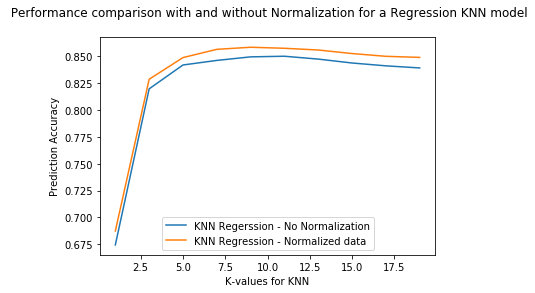

In [9]:
max_index = np.argmax(K_regression_range)
max_index_norm = np.argmax(K_regression_norm)

print("\nWithout Normalization, performance is highest at K = ",K[max_index]);
print("\nWith Normalization, performance is highest at K = ",K[max_index_norm]);
plt.plot(K, K_regression_range)
plt.plot(K, K_regression_norm)

plt.legend(['KNN Regerssion - No Normalization','KNN Regression - Normalized data'], loc = 'lower center')
plt.xlabel('K-values for KNN')
plt.ylabel('Prediction Accuracy');
plt.title(' Performance comparison with and without Normalization for a Regression KNN model\n');

## Section(ii)

In all the KNN implementaions executed so far, by default all the features contribute equally in the distance measurements and in predicting the target class value of a query instance. This might negatively impact the performance, if some of the features in the dataset are redundant or are not much relevant to the classification problem in hand. An attribute is considered to be relevant to the problem only if a change in the attribute value affects the classification results.


Inorder to overcome the above issue, we can use feature selection methods that can either assign weights to each feature based on its relevance to the classification or can assign a weight of zero for a few features that are considered irrelevant.


The former can be achieved by using an attribute ranking algorithm that assigns feature weights based on the ranks. The later can be achieved by using a subset selection algorithm[Reference 2].


Preproessing methods can also be used to overcome the above issue. Dimensionality reduction techniques such as Principal component analysis(PCA) can be applied prior to KNN so that the distance measurements turn out to be meaningful.


## References

[1] Lecture slides<br>
[2] "Attribute weighting in K-nearest neighbor classification" - Muhammad Ejazuddin Syed (Nov 2014)